# Gaussian Mixture Models

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D



In [31]:
# RGB-waardes van pixels uit de foto
RGB = [[247, 247, 247],
       [255, 247, 255],
       [234, 234, 234],
       [221, 221, 221],
       [247, 234, 247],
       [234, 221, 234],
       [255, 255, 255],
       [235, 164, 152],
       [234, 234, 247],
       [234, 221, 221],
       [ 78,  78,  65],
       [231, 150, 151],
       [ 65,  65,  52],
       [221, 208, 208],
       [ 78,  78,  52],
       [234, 182, 156],
       [247, 247, 255],
       [221, 182, 143],
       [104, 78,   52],
       [ 78, 52,   39],
       [104, 78,   65],
       [234, 168, 149],
       [233, 161, 156]]

len(RGB)

23

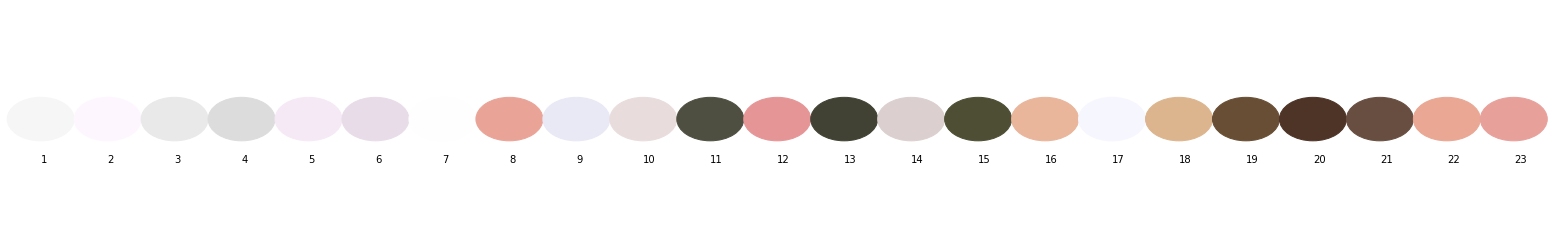

In [32]:
fig, ax = plt.subplots()

i = 0
for color in RGB:
    circle = plt.Circle((i*0.2, 0.5), 0.1, color=[c/256 for c in color], clip_on=False)
    ax.add_artist(circle)
    ax.text(i*0.2, 0.3, str(i+1)) #, fontsize='large', color='darkblue')
    i += 1
    
plt.axis('off')
plt.show()

### 1. Maak een GMM aan

In [33]:
gmm = GaussianMixture(n_components=3, random_state=0)

### 2. Train het model

In [34]:
gmm.fit(RGB)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

### 3. Toon de klassen van de gegeven waarden

In [35]:
np.around(gmm.predict_proba(RGB), decimals=1)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

### Voorspel het cluster van de kleur (240, 204, 179)

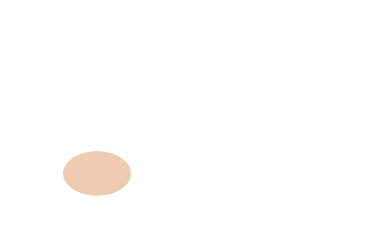

In [36]:
colorsnap = np.array([240, 204, 179])

fig, ax = plt.subplots()

circle = plt.Circle((0.2, 0.25), 0.1, color=[c/256 for c in colorsnap], clip_on=False)
ax.add_artist(circle)
    
plt.axis('off')
plt.show()

In [37]:
# zet de RGB waarden samen met de toegewezen kleurgroepen in een dataframe
rgbdf = pd.DataFrame(RGB)
rgbdf.columns = ['Rood', 'Groen', 'Blauw']
rgbdf

,Rood,Groen,Blauw
0,247,247,247
1,255,247,255
2,234,234,234
3,221,221,221
4,247,234,247
5,234,221,234
6,255,255,255
7,235,164,152
8,234,234,247
9,234,221,221


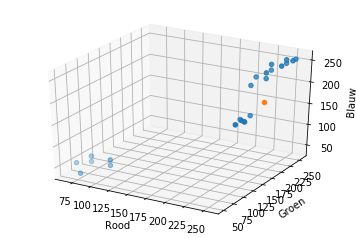

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rgbdf['Rood'], rgbdf['Groen'], rgbdf['Blauw'])#, c=rgbdf['Groep'])
ax.scatter(colorsnap[0], colorsnap[1], colorsnap[2])#, c=rgbdf['Groep'])

ax.set_xlabel('Rood')
ax.set_ylabel('Groen')
ax.set_zlabel('Blauw')

plt.show()

In [39]:
np.around(gmm.predict_proba([colorsnap]), decimals=2)

array([[0.  , 0.42, 0.58]])